In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
regr = linear_model.LinearRegression()

In [3]:
# 모델 생성
x = [[164],[179],[162],[170]]
y = [53,63,55,59]
regr.fit(x,y)

LinearRegression()

In [6]:
# 내가 만든 모델의 성능을 평가 - score
score = regr.score(x,y)
print(score)

0.903203123105647


0.903203123105647 = 결정계수 (0과 1 사이) (1에 가까울 수록 성능이 좋다) -> 90%는 맞출 것이다

In [7]:
input_data = [[180],[185]]
result = regr.predict(input_data)
print(result)

[63.71244635 66.47353362]


180 - 63.71244635 / 185 -  66.47353362

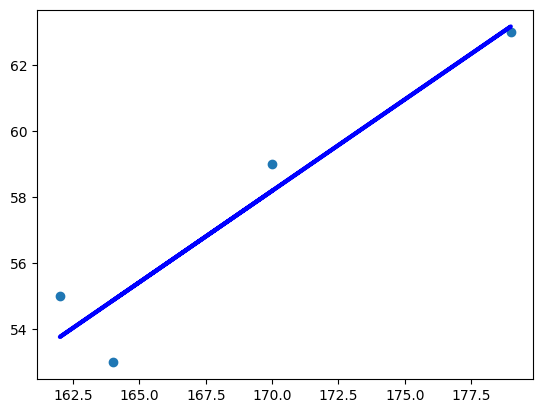

In [8]:
plt.scatter(x,y)
y_pred = regr.predict(x)
plt.plot(x,y_pred,color ='blue',linewidth=3)
plt.show()

# 실습 - 선형 회귀 알고리즘을 활용한 회귀 모델 만들기

학습을 위한 데이터 준비

In [24]:
x = [[2.1],[10],[3],[1],[3.5],[5],[8]]
y = [64.9,292.6,85.9,30.92,110.5,163.4,163.4]

상관도 분석

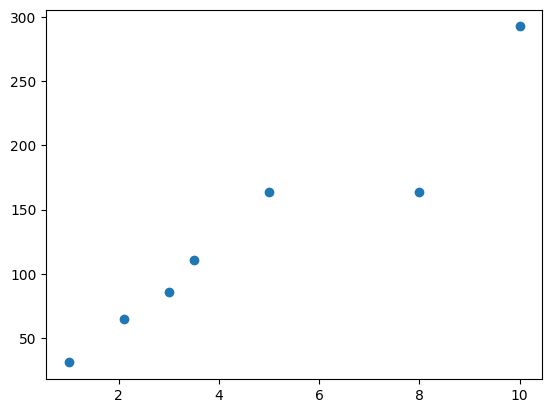

In [25]:
plt.scatter(x,y)
plt.show()

선형 회귀 알고리즘 객체 생성

In [26]:
# 다른 표현식
from sklearn.linear_model import LinearRegression

# 객체 생성
regr = LinearRegression()

선형 회귀 객체 모델의 학습을 수행하여 머신러닝 모델 생성

In [27]:
# 선형 회귀 모델 생성
regr.fit(x,y)

LinearRegression()

예측값 생성 (예측하기 - 재배면적 7,12에 대한 수확량 예측)

In [28]:
# 모델 평가
score = regr.score(x,y)
print(score)

0.9084260459892224


In [29]:
# 예측하기
input_data = [[7],[12]]
result = regr.predict(input_data)
print(result)

[189.55106566 316.14785212]


In [30]:
prd = regr.predict([[7],[12]])
print(prd)

[189.55106566 316.14785212]


결정트리 모델

입력 데이터가 2개일 때

In [31]:
# 간단한 샘플 데이터 생성
parents_height = [[180,165],[175,160],[180,172],[165,160],[171,152]]
child_height = [3,2,2,1,1]

In [32]:
# 사이킷런 결정트리 모델 생성
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()

In [33]:
# 모델에 데이터 적용
dt_model.fit(parents_height,child_height)

DecisionTreeClassifier()

In [37]:
# 예측하기
dt_pred = dt_model.predict([[175,153]])
print(dt_pred)

[2]


4. 예측하는 인공지능

In [40]:
import pandas as pd
df = pd.read_csv('Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [41]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [43]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [44]:
df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [45]:
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


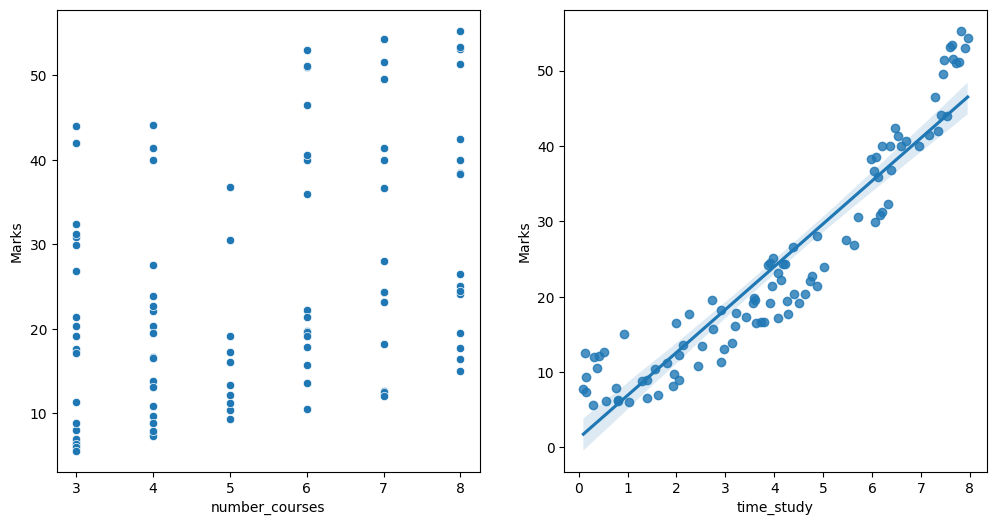

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2,figsize=(12,6))
sns.scatterplot(data=df,x='number_courses',y='Marks',ax=ax[0])
sns.regplot(data=df,x='time_study',y='Marks',ax=ax[1])
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
x = df.drop('Marks',axis=1)
y = df['Marks']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
lr_pred = lr.predict(x_test)
lr_pred

array([19.27278272, 37.76035676, 20.18779372,  9.65670863, 10.97508223,
       44.81200554, 13.34810968, 47.62447209, 37.01567001, 22.30738483,
       44.48113375, 28.33573684,  7.42332402, 38.70638699, 28.10820618,
       48.74122069, 35.72331468, 39.30103485, 28.29432156,  8.94326632])

In [ ]:
# 모델 평가

In [52]:
r2_score(y_test,lr_pred)

0.9459936100591213

In [53]:
# 오차범위 (비교대상이 없기 때문에 좋은지 아닌지를 판단할 수 없지만 높으면 높을수록 좋다)
mean_squared_error(y_test,lr_pred)

14.200726136374552

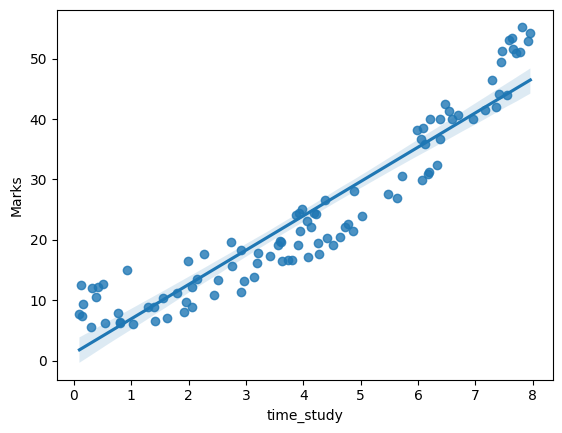

In [54]:
sns.regplot(x = df['time_study'], y = df['Marks'])
plt.show()